# Libraries and Dependencies

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


import joblib

# Data Reading

In [3]:
train_df = pd.read_csv(r"C:\Users\Rohan\Documents\Research\Other\Natural Language Processing\train.csv")

In [4]:
train_df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [11]:
train_df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [5]:
train_df = train_df.drop(["id"], axis=1)

In [13]:
train_df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


# Exploratory Data Analysis


In [6]:
temp_1 = train_df['malignant'].apply(lambda x: "Not Malignant" if x < 0.5 else "Malignant")    
temp_2 = train_df['highly_malignant'].apply(lambda x: "Not Highly Malignant" if x < 0.5 else "Highly Malignant")    
temp_3 = train_df['loathe'].apply(lambda x: "Not Loathe" if x < 0.5 else "Loathe")    
temp_4 = train_df['rude'].apply(lambda x: "Not Rude" if x < 0.5 else "Rude")    
temp_5 = train_df['abuse'].apply(lambda x: "Not Abuse" if x < 0.5 else "Abuse")    
temp_6 = train_df['threat'].apply(lambda x: "Not Threat" if x < 0.5 else "Threat")    

_Malignant Plot_

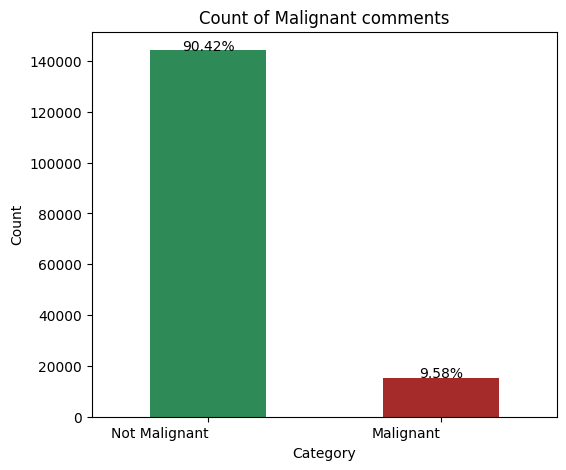

In [7]:
temp_flattened = np.ravel(temp_1)
data = pd.DataFrame({'target': temp_flattened})
total = len(temp_flattened)

fig, ax = plt.subplots(figsize=(6,5))
data['target'].value_counts().plot(kind='bar', color=['seagreen', 'brown'])
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
ax.set_title('Count of Malignant comments')

for p in ax.patches:
    # Get height.
    height = p.get_height()
    # Plot at appropriate position.
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')
plt.show()

_Highly-Malignant Plot_

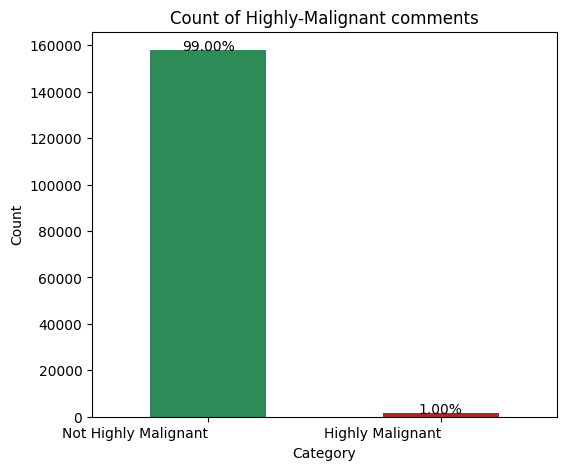

In [8]:
temp_flattened = np.ravel(temp_2)
data = pd.DataFrame({'target': temp_flattened})
total = len(temp_flattened)


fig, ax = plt.subplots(figsize=(6,5))
data['target'].value_counts().plot(kind='bar', color=['seagreen', 'brown'])
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
ax.set_title('Count of Highly-Malignant comments')

for p in ax.patches:
    # Get height.
    height = p.get_height()
    # Plot at appropriate position.
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')
plt.show()

_Loathe Plot_

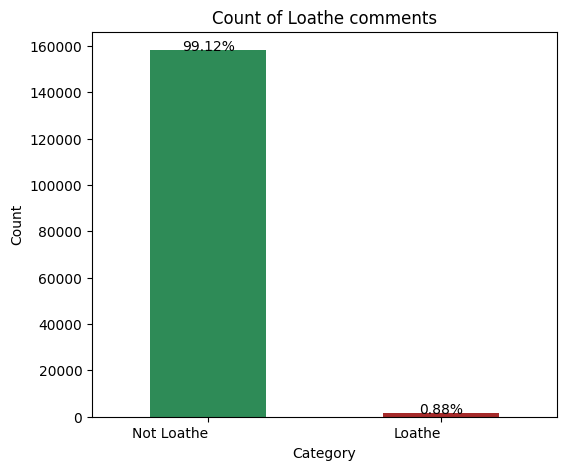

In [9]:
temp_flattened = np.ravel(temp_3)
data = pd.DataFrame({'target': temp_flattened})
total = len(temp_flattened)



fig, ax = plt.subplots(figsize=(6,5))
data['target'].value_counts().plot(kind='bar', color=['seagreen', 'brown'])
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
ax.set_title('Count of Loathe comments')

for p in ax.patches:
    # Get height.
    height = p.get_height()
    # Plot at appropriate position.
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')
plt.show()

_Rude Plot_

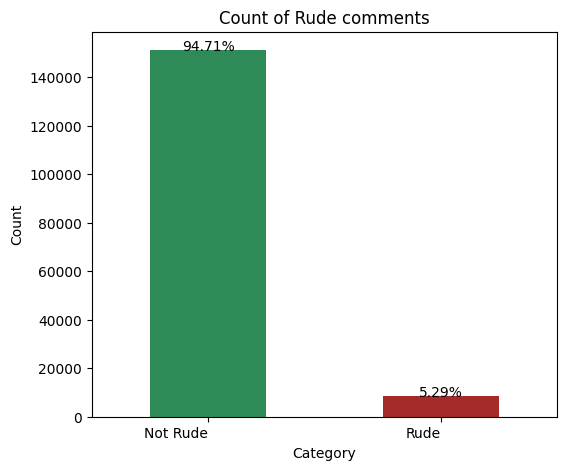

In [10]:
temp_flattened = np.ravel(temp_4)
data = pd.DataFrame({'target': temp_flattened})
total = len(temp_flattened)


fig, ax = plt.subplots(figsize=(6,5))
data['target'].value_counts().plot(kind='bar', color=['seagreen', 'brown'])
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
ax.set_title('Count of Rude comments')

for p in ax.patches:
    # Get height.
    height = p.get_height()
    # Plot at appropriate position.
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')
plt.show()

_Abuse Plot_

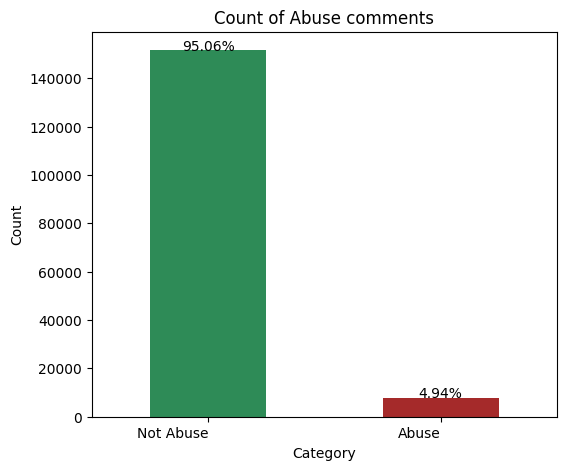

In [11]:
temp_flattened = np.ravel(temp_5)
data = pd.DataFrame({'target': temp_flattened})
total = len(temp_flattened)


fig, ax = plt.subplots(figsize=(6,5))
data['target'].value_counts().plot(kind='bar', color=['seagreen','brown'])
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
ax.set_title('Count of Abuse comments')

for p in ax.patches:
    # Get height.
    height = p.get_height()
    # Plot at appropriate position.
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')
plt.show()

_Threat Plot_

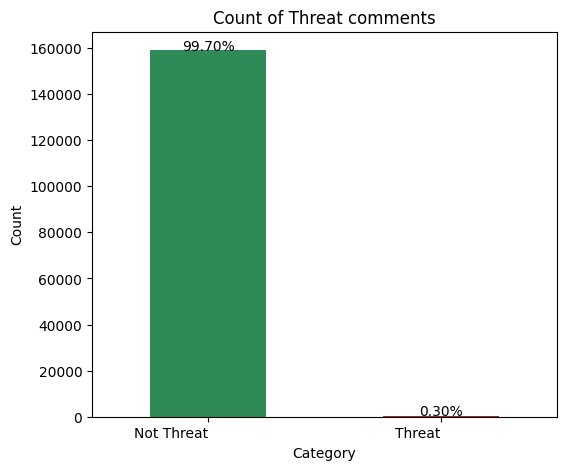

In [12]:
temp_flattened = np.ravel(temp_6)
data = pd.DataFrame({'target': temp_flattened})
total = len(temp_flattened)


fig, ax = plt.subplots(figsize=(6,5))
data['target'].value_counts().plot(kind='bar', color=['seagreen', 'brown'])
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
ax.set_title('Count of Threat comments')

for p in ax.patches:
    # Get height.
    height = p.get_height()
    # Plot at appropriate position.
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')
plt.show()

# Data Cleaning

In [13]:
# Replace email addresses with 'email'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', regex=True)

# Replace URLs with 'webaddress'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress', regex=True)

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train_df['comment_text'] = train_df['comment_text'].str.replace(r'£|\$', 'dollers', regex=True)
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber', regex=True)
   
# Replace numbers with 'number'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'\d+(\.\d+)?', 'number', regex=True)
# Remove punctuation
train_df['comment_text'] = train_df['comment_text'].str.replace(r'[^\w\d\s]', ' ', regex=True)

# Replace whitespace between terms with a single space
train_df['comment_text'] = train_df['comment_text'].str.replace(r'\s+', ' ', regex=True)

# Remove leading and trailing whitespace
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\s+|\s+?$', '', regex=True)

_Malignant comments WordCloud_

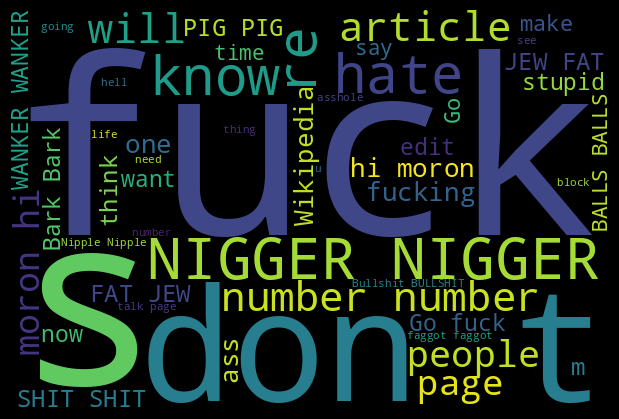

In [28]:
hams = train_df['comment_text'][train_df['malignant']==1]
spam_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=50).generate(''. join(hams))
plt.figure(figsize=(6,6), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Categorical Visualization

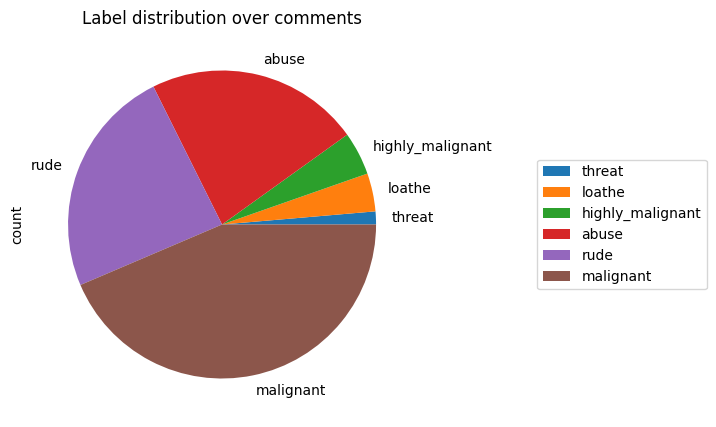

In [34]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = train_df[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

# Data Pre-processing

In [35]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [37]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

_Lemmatization_

In [ ]:
for i in range(len(train_df['comment_text'])):
    train_df = train_df.assign(comment_text=train_df['comment_text'].str.lower())
    k = []
    for word in train_df['comment_text'][i].split():
        k.append(lemmatizer.lemmatize(word, pos='v'))
        train_df = train_df.assign(comment_text=train_df['comment_text'].str.join(''))

In [40]:
x = train_df['comment_text']
y = train_df[train_df.columns[2]].values

In [41]:
comment = train_df['comment_text']

In [42]:
naive = MultinomialNB()
tf_vec = TfidfVectorizer()
x=tf_vec.fit_transform(comment)

# Train_Test_Split & Model training

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
naive.fit(x_train, y_train)

MultinomialNB()

In [71]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [72]:
def calculate_metrics(y_true, y_pred):

    metrics = {
        "accuracy": accuracy_score(y_true, y_pred),
        "f1_score": f1_score(y_true, y_pred, average="weighted"),
        "precision": precision_score(y_true, y_pred, average="weighted"),
        "recall": recall_score(y_true, y_pred, average="weighted"),
    }

    return metrics

In [44]:
y_pred = naive.predict(x_test)

# Model Evaluation

In [73]:
metrics = calculate_metrics(y_test, y_pred)

print("Accuracy:", metrics["accuracy"])
print("F1 score:", metrics["f1_score"])
print("Precision:", metrics["precision"])
print("Recall:", metrics["recall"])

Accuracy: 0.9043396522011593
F1 score: 0.8590061752677215
Precision: 0.9134914146049529
Recall: 0.9043396522011593


In [45]:
joblib.dump(y_pred, "model")

['model']

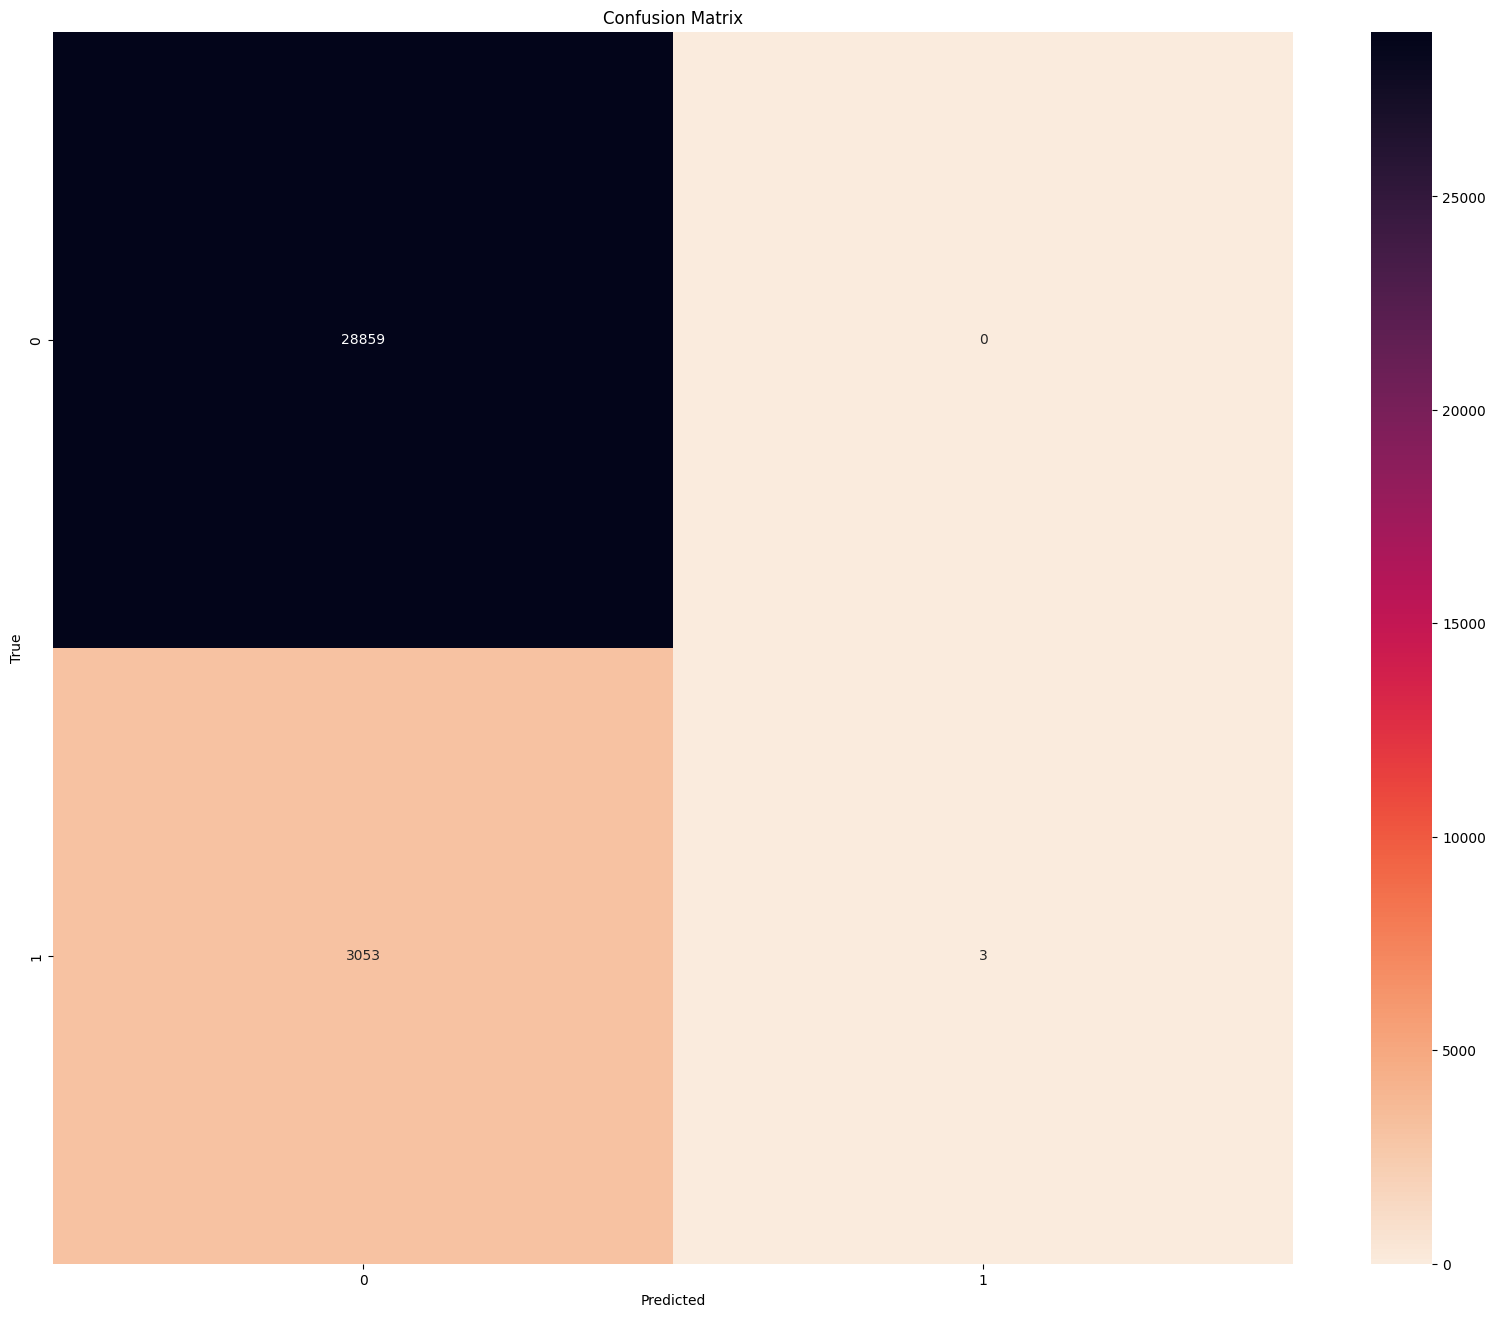

In [46]:
confusion_matrix_np = confusion_matrix(y_test, y_pred)
num_classes = 2
# Create a heatmap for the confusion matrix
plt.figure(figsize=(20, 16))
sns.heatmap(confusion_matrix_np, annot=True, fmt='g', cmap='rocket_r',
            xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [47]:
import pickle
with open('model1.pkl', 'wb') as f:
    pickle.dump(naive, f)